In [9]:
import mesa
from mesa import Model, Agent
from mesa.datacollection import DataCollector
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from DataMarket_persona_welfare import DataMarket, Participants
from mesa.batchrunner import batch_run
from visualize import final_holders


In [10]:
persona_dist = [{
    'Bandwagon': 0.7,
    'Neutral': 0.15,
    'Snob': 0.15
},{
    'Bandwagon': 0.15,
    'Neutral': 0.15,
    'Snob': 0.7
},{
    'Bandwagon': 0.15,
    'Neutral': 0.7,
    'Snob': 0.15
}]


w1_params = [(2.0, 100)]

In [11]:
# test_model = DataMarket(num_agents = 1000, num_data = 1000, initial_price = 200, persona_dist = persona_dist, wealth_alpha = 2, wealth_scale = 100, w1_params = (2, 100), tau=0.1, seed=None)

# for _ in range(50):
#     test_model.step()
#     test_model.datacollector.collect(test_model)



In [12]:

# 全体レンジ（10刻み）
base_prices = np.logspace(
    np.log10(10),     # 10 の log10
    np.log10(2000),   # 2000 の log10
    num=40            # 点の数（元の 1〜40 と同じ）
)

# 必要なら四捨五入して整数に
base_prices = base_prices.round().astype(int)

print(base_prices)

all_results = []

for dist in persona_dist:
    params = {
        "num_agents":50,
        "num_data": 50,
        "initial_price": base_prices,
        "tau": 0.2,
        "persona_dist": [dist],
        "wealth_alpha": 2.0,
        "wealth_scale": 100,
        "w1_params": w1_params,
        "seed": 42
    }
    results = batch_run(
        model_cls=DataMarket,
        parameters=params,
        iterations=3,           # 各価格につき 3回繰り返す
        max_steps=20,           # 各シミュレーションのステップ数上限
        number_processes=None,   # CPU 全て使いたいなら None
        data_collection_period=1,
        display_progress=True,
    )


    # dist の種類を記録したい場合はここで付与しておく
    for r in results:
        r['persona_dist'] = str(dist)   # or dist.copy()

    all_results.extend(results)  # ← 上書きしない
    
results_df = pd.DataFrame(all_results)

results_df.to_csv("results_test.csv", index=False, encoding="utf-8")


[  10   11   13   15   17   20   23   26   30   34   39   45   51   58
   67   77   88  101  115  132  151  173  199  228  261  299  342  392
  449  514  589  675  773  885 1014 1162 1331 1524 1746 2000]


100%|██████████| 120/120 [00:01<00:00, 67.14it/s]


In [13]:
print(results_df.columns)

results_df.head()

Index(['RunId', 'iteration', 'Step', 'num_agents', 'num_data', 'initial_price',
       'tau', 'persona_dist', 'wealth_alpha', 'wealth_scale', 'w1_params',
       'seed', 'Holders', 'ProviderRevenue', 'AgentID', 'w_1', 'w_n', 'alpha',
       'lamb', 'l_n_minus_1', 'HasToken', 'Wealth', 'Persona', 'BoughtStep',
       'CurrentUtility'],
      dtype='object')


,RunId,iteration,Step,num_agents,num_data,initial_price,tau,persona_dist,wealth_alpha,wealth_scale,...,w_1,w_n,alpha,lamb,l_n_minus_1,HasToken,Wealth,Persona,BoughtStep,CurrentUtility
0,8,0,0,50,50,30,0.2,"{'Bandwagon': 0.7, 'Neutral': 0.15, 'Snob': 0.15}",2.0,100,...,465.322322,350.237787,0.752678,0.875171,-407.236411,False,135.298762,Bandwagon,NaN,0.0
1,8,0,0,50,50,30,0.2,"{'Bandwagon': 0.7, 'Neutral': 0.15, 'Snob': 0.15}",2.0,100,...,154.152994,38.475834,0.249595,0.208439,-32.131502,False,565.317997,Snob,NaN,0.0
2,8,0,0,50,50,30,0.2,"{'Bandwagon': 0.7, 'Neutral': 0.15, 'Snob': 0.15}",2.0,100,...,174.971913,73.432838,0.419684,0.596833,-104.429019,False,192.121576,Neutral,NaN,0.0
3,8,0,0,50,50,30,0.2,"{'Bandwagon': 0.7, 'Neutral': 0.15, 'Snob': 0.15}",2.0,100,...,113.178435,90.758382,0.801905,0.899508,-101.804854,False,129.034998,Bandwagon,NaN,0.0
4,8,0,0,50,50,30,0.2,"{'Bandwagon': 0.7, 'Neutral': 0.15, 'Snob': 0.15}",2.0,100,...,125.474582,93.089769,0.741901,0.774036,-97.121868,False,165.676588,Bandwagon,NaN,0.0


In [14]:
final_holders()


TypeError: final_holders() missing 2 required positional arguments: 'results_df' and 'dist'

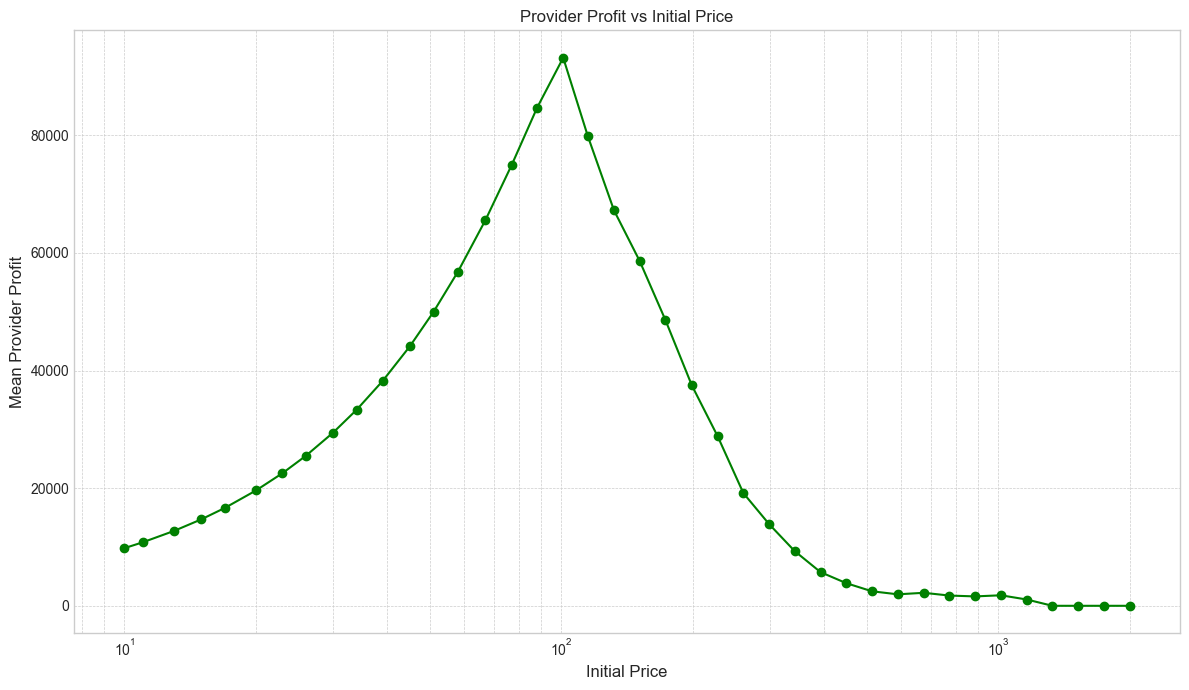

価格ごとの平均提供者利益:
initial_price
10       9803.921569
11      10784.313725
13      12745.098039
15      14705.882353
17      16666.666667
20      19607.843137
23      22549.019608
26      25490.196078
30      29411.764706
34      33332.666667
39      38234.529412
45      44115.000000
51      49992.000000
58      56825.215686
67      65548.333333
77      74973.843137
88      84681.882353
101     93195.274510
115     79852.843137
132     67238.901961
151     58688.666667
173     48633.352941
199     37461.424837
228     28808.470588
261     19167.294118
299     13882.980392
342      9310.000000
392      5726.274510
449      3847.313725
514      2469.215686
589      1951.784314
675      2210.294118
773      1743.039216
885      1596.470588
1014     1789.411765
1162     1070.862745
1331        0.000000
1524        0.000000
1746        0.000000
2000        0.000000
Name: ProviderRevenue, dtype: float64


In [ ]:
def provider_profit():

    # 1. 価格ごとに提供者利益の平均を計算
    # 'Provider_Revenue' は、BatchRunnerで設定した列名に合わせてください。
    mean_revenue_by_price = results_df.groupby('initial_price')['ProviderRevenue'].mean()

    # --- グラフ描画 ---
    plt.style.use('seaborn-v0_8-whitegrid')
    fig, ax = plt.subplots(figsize=(12, 7))

    mean_revenue_by_price.plot(
        kind='line',
        ax=ax,
        marker='o',
        color='green',
        title='Provider Profit vs Initial Price'
    )

    ax.set_xlabel('Initial Price', fontsize=12)
    ax.set_ylabel('Mean Provider Profit', fontsize=12)
    ax.set_xscale('log')
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.tight_layout()
    plt.show()

    # --- 結果のテーブルも表示 ---
    print("価格ごとの平均提供者利益:")
    print(mean_revenue_by_price)

provider_profit()

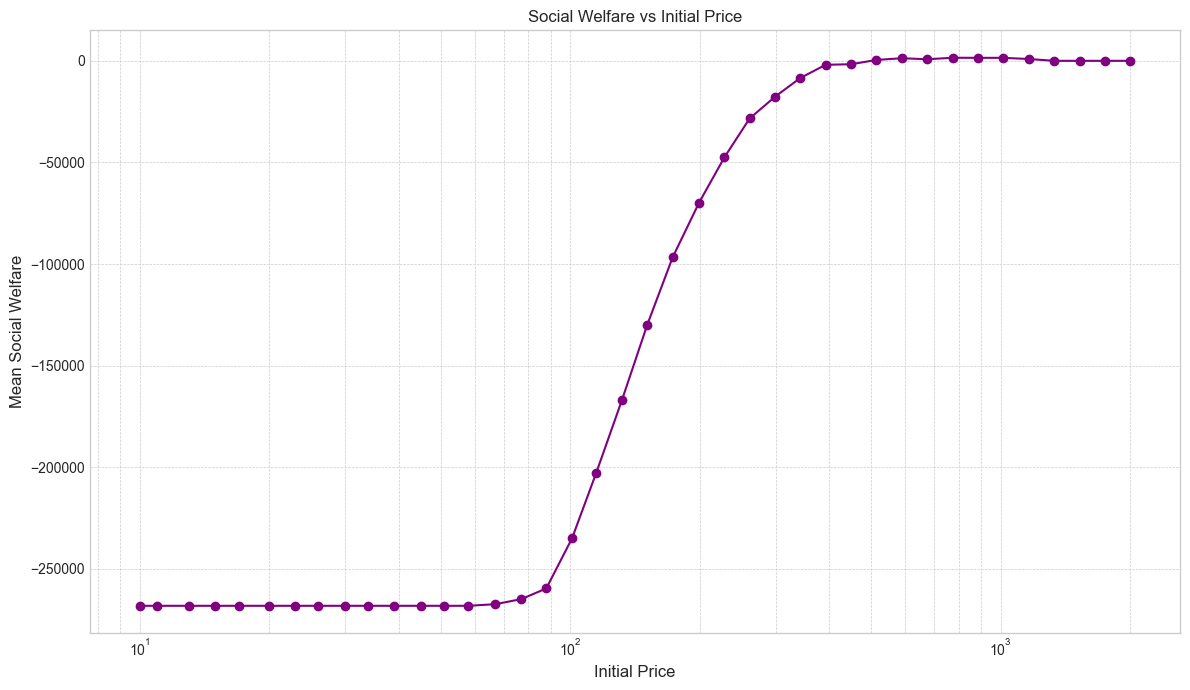

価格ごとの平均社会的厚生:
initial_price
10     -268187.329416
11     -268187.329416
13     -268187.329416
15     -268187.329416
17     -268187.329416
20     -268187.329416
23     -268187.329416
26     -268187.329416
30     -268187.329416
34     -268187.329416
39     -268187.329416
45     -268187.329416
51     -268187.329416
58     -268187.329416
67     -267393.263858
77     -264901.093259
88     -259639.914541
101    -234942.549120
115    -202619.352187
132    -166698.382364
151    -129865.966787
173     -96634.084329
199     -69966.060228
228     -47541.567798
261     -28373.459306
299     -17662.474364
342      -8488.961600
392      -1943.624356
449      -1679.569622
514        430.893879
589       1279.418752
675        770.856197
773       1520.866504
885       1472.900960
1014      1472.900960
1162       892.211266
1331         0.000000
1524         0.000000
1746         0.000000
2000         0.000000
Name: final_utility, dtype: float64


In [ ]:
def social_welfare():
    # --- データ準備 ---
    # 最終ステップ番号を取得
    final_step = results_df['Step'].max()
    # 最終ステップの全エージェントのデータを抽出
    final_step_df = results_df[results_df['Step'] == final_step].copy()

    # 各Run（シミュレーションの各試行）の最終的な購入者数(k_final)を計算
    k_final_per_run = final_step_df.groupby('RunId')['HasToken'].sum()

    # 各エージェントのデータに、所属するRunのk_final情報を結合
    final_step_df = final_step_df.join(k_final_per_run.rename('k_final'), on='RunId')

    # --- 各エージェントの最終効用を計算する関数 ---
    def calculate_final_utility(row):
        # モデルの総エージェント数 (定数)
        n = 1000 
        k = row['k_final']  
        
        if row['HasToken']: # 購入者の場合
            # W(k) = w_1 - (w_1 - w_n) * (k / (n-1))
            utility = row['w_1'] - (row['w_1'] - row['w_n']) * (k / (n - 1))
        else: # 非購入者の場合
            # L(k) = l_n-1 * (k / (n-1))
            utility = row['l_n_minus_1'] * (k / (n - 1))
        return utility

    # 全エージェントに上記関数を適用して、最終効用を計算
    final_step_df['final_utility'] = final_step_df.apply(calculate_final_utility, axis=1)

    # --- 社会的厚生の計算 ---
    # RunIdごとに全エージェントの最終効用を合計し、そのRunの社会的厚生とする
    sw_per_run = final_step_df.groupby('RunId')['final_utility'].sum()

    # RunIdに対応するinitial_priceを紐付け
    run_to_price = results_df[['RunId', 'initial_price']].drop_duplicates().set_index('RunId')
    sw_per_run = sw_per_run.to_frame().join(run_to_price)

    # 価格ごとに社会的厚生の平均を計算
    mean_sw_by_price = sw_per_run.groupby('initial_price')['final_utility'].mean()

    # --- グラフ描画 ---
    plt.style.use('seaborn-v0_8-whitegrid')
    fig, ax = plt.subplots(figsize=(12, 7))

    mean_sw_by_price.plot(
        kind='line',
        ax=ax,
        marker='o',
        color='purple',
        title='Social Welfare vs Initial Price'
    )

    ax.set_xlabel('Initial Price', fontsize=12)
    ax.set_ylabel('Mean Social Welfare', fontsize=12)
    ax.set_xscale('log')
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.tight_layout()
    plt.show()

    # --- 結果のテーブルも表示 ---
    print("価格ごとの平均社会的厚生:")
    print(mean_sw_by_price)

social_welfare()

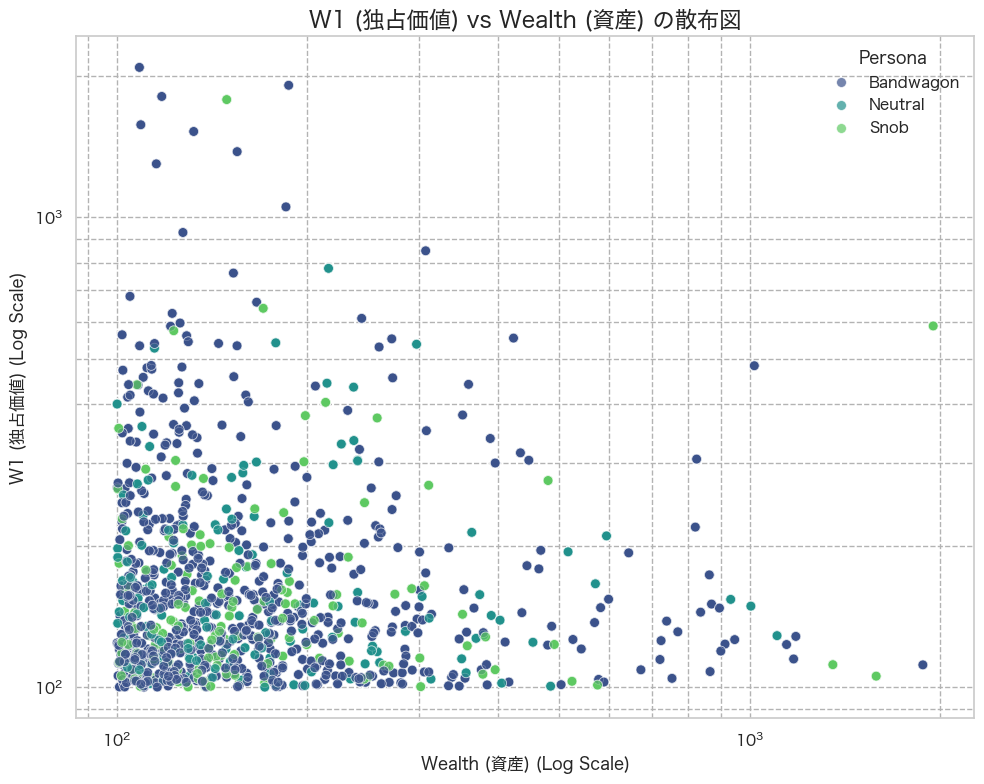

In [ ]:

import pandas as pd # Ensure pandas is imported if not already

def visualize_w1_wealth_scatter(results_df):
    """
    シミュレーション結果から、W1 (独占価値) と Wealth (資産) の散布図を可視化する。
    ペルソナ別に色分けし、対数スケールで表示する。

    Args:
        results_df (pd.DataFrame): batch_runの出力結果DataFrame。
                                   'w_1', 'Wealth', 'Persona'カラムを含むこと。
    """
    # 各エージェントの初期パラメータはRunIdとAgentIDで一意なので、重複を除去
    # Step 0のデータを使用するのが最も適切
    initial_agent_params = results_df[results_df['Step'] == 0].drop_duplicates(subset=['RunId', 'AgentID'])

    if initial_agent_params.empty:
        print("可視化するデータが見つかりません。results_dfにStep 0のデータが含まれているか確認してください。")
        return

    try:
        sns.set_theme(style="whitegrid", font='Hiragino Sans')
    except RuntimeError:
        print("日本語フォント'Hiragino Sans'が見つかりません。英語表示にフォールバックします。")
        sns.set_theme(style="whitegrid")

    plt.figure(figsize=(10, 8))
    sns.scatterplot(
        data=initial_agent_params,
        x='Wealth',
        y='w_1',
        hue='Persona',
        palette='viridis',
        alpha=0.7,
        s=50, # Adjust point size
        hue_order=['Bandwagon', 'Neutral', 'Snob']
    )

    plt.title('W1 (独占価値) vs Wealth (資産) の散布図', fontsize=16)
    plt.xlabel('Wealth (資産) (Log Scale)', fontsize=12)
    plt.ylabel('W1 (独占価値) (Log Scale)', fontsize=12)
    plt.xscale('log')
    plt.yscale('log')
    plt.grid(True, which="both", ls="--", c='0.7')
    plt.legend(title='Persona')
    plt.tight_layout()
    plt.show()
    
visualize_w1_wealth_scatter(results_df)

12


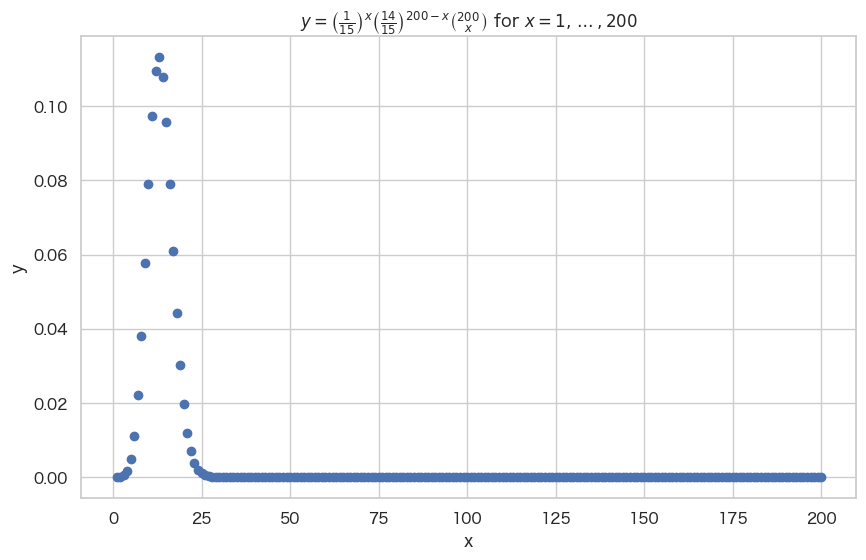

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from math import comb

# Parameters
n = 200
p = 1/15

# x range from 1 to 200
x_values = np.arange(1, n+1)
y_values = np.array([ (p**x) * ((1-p)**(n-x)) * comb(n, x) for x in x_values ])

print(np.argmax(y_values))

# Plot
plt.figure(figsize=(10, 6))
plt.plot(x_values, y_values, marker='o', linestyle='')
plt.xlabel('x')
plt.ylabel('y')
plt.title(r'$y = \left(\frac{1}{15}\right)^x \left(\frac{14}{15}\right)^{200-x} \binom{200}{x}$ for $x=1,\dots,200$')
plt.grid(True)
plt.show()
